In [3]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import tensorflow as tf
print(tf.version)

#/opt/cuda/targets/x86_64-linux/include,/opt/cuda/targets/x86_64-linux/lib/,/opt/cuda,/usr/include,/usr/include,/usr/lib

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
a = tf.Variable("this is a string", tf.string)

2024-07-01 17:01:20.522605: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-01 17:01:20.710337: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
tf.rank(a)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import clear_output
import urllib.request as urllib  # Directly use Python 3's urllib
import tensorflow as tf

In [5]:
dftrain =pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval =pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


<Axes: >

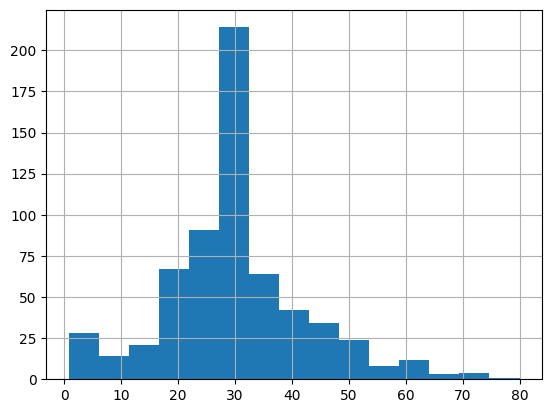

In [6]:
dftrain.age.hist(bins=15)

<Axes: ylabel='class'>

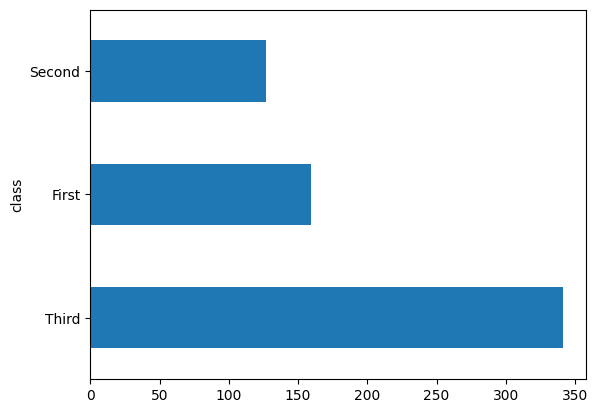

In [7]:
dftrain['class'].value_counts().plot(kind='barh')

<Axes: ylabel='sex'>

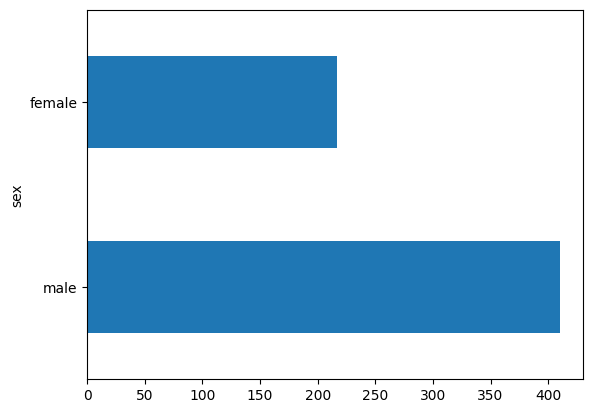

In [8]:
dftrain.sex.value_counts().plot(kind='barh')


Text(0.5, 0, '%survived')

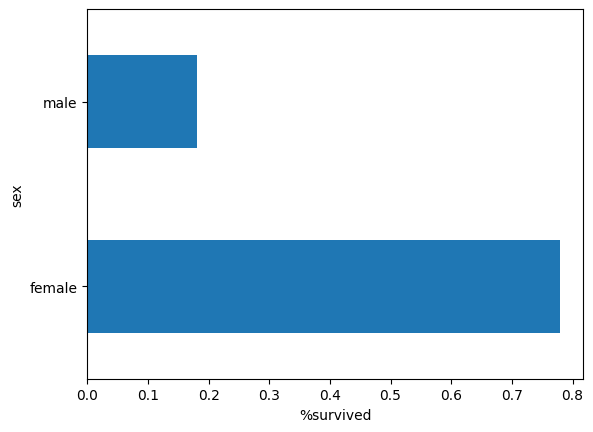

In [9]:
pd.concat([dftrain,y_train],axis=1).groupby('sex').survived.mean().plot(kind = 'barh').set_xlabel(f'%survived')

time to get building the model, we need to first assign numerical values to categorical columns for that we shall create two seperate arrays.

In [10]:
dftrain['embark_town'].unique()
# returns an array which has all the possible unique values of a feature

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

# Make Feature Columns

In [11]:
CATEGORICAL_COLS= ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']
NUMERIC_COLUMNS=['age','fare']

feature_columns=[]

for feature in CATEGORICAL_COLS:
    vocab = dftrain[feature].unique()
    CategoricalCols =(tf.feature_column.categorical_column_with_vocabulary_list(feature,vocab))
    oneHotCol = tf.feature_column.indicator_column(CategoricalCols)
    feature_columns.append(oneHotCol)
for feature in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature,dtype=tf.float32))
print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_

a = tf.data.Dataset.from_tensor_slices(dict(dftrain),y_train)

# Make the input function
use pandas df and the y axis training set.

In [12]:
def returnInputFunction(data_df, data_y, shuffle=True, epoch_times=10, batch_size=32):
    def inputFunction():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), data_y))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(epoch_times)
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds
    return inputFunction



In [13]:
tf.shape(y_train)

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([627], dtype=int32)>

In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

# Assuming you have defined your input functions
trainInputFn = returnInputFunction(dftrain, y_train)
evalInputFn = returnInputFunction(dfeval, y_eval, shuffle=False, epoch_times=1, batch_size=32)
print(trainInputFn())
# Define your model
model = Sequential()
model.add(layers.InputLayer(input_shape=(None,)))
model.add(layers.Dense(32))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()

# Get the training dataset
train_data = trainInputFn()
# Fit the model using the training data
model.fit(train_data, epochs=10, batch_size=32)  # Assuming train_data is (features, labels)


AttributeError: module 'tensorflow.keras.layers' has no attribute 'DenseFeatures'